# Analyzing the Impact of *Epic Systems Corp. v. Lewis*

By [Ben Hancock](https://www.law.com/author/profile/Ben-Hancock/)

This is part of a data journalism project by the *National Law Journal* to assess the impact of *Epic Systems Corp. v. Lewis*, a May 2018 decision by the U.S. Supreme Court that centered on the enforceability of mandatory workplace arbitration agreements. In collaboration with [Casetext](https://casetext.com/), we identified and categorized nearly 100 federal district and appellate decisions from 2018 that cited *Epic* in order to assess how the case is changing the law around arbitration. You can read more about our methodology in the [README file](https://github.com/bhancock-alm/epic-impact/blob/master/README.md).

You are looking at a [Jupyter Notebook](https://jupyter.org/), a saved interactive data analysis and computing session that uses the Python programming language. Our goal in presenting this to our audience is to "show our work" and give greater transparency into the approach we took in reporting an issue with wide public interest and significance. Even if you're not a programmer, we invite you to follow along -- with the help of plain-language comments interspersed below -- and see the steps we took to arrive at the figures cited in our [final article](https://www.law.com/nationallawjournal/2019/02/28/epic-impact-how-a-major-scotus-decision-in-favor-of-arbitration-is-shaping-the-landscape-for-workplace-lawsuits). At bottom, we show you how we formulated one of the main data visualizations presented in the story. If you're just interested in seeing the underlying data, [that's here too](https://github.com/bhancock-alm/epic-impact/blob/master/epic_data_full.csv).

This is an experiment for our newsroom that aims to foster conversation with our audience in a new way. If you have questions, comments, or critiques, feel free to contact me at [bhancock@alm.com](mailto:bhancock@alm.com).

---

Import `pandas`, the [Python Data Analysis Library](https://pandas.pydata.org/), and a couple tools for data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data we collected on decisions citing *Epic*

In [2]:
data = pd.read_csv('epic_data_full.csv', index_col='decision_id')

Get a feel for the data set

In [3]:
data.shape

(92, 14)

In [4]:
data.columns

Index(['case_name_short', 'case_name_long', 'jurisdiction_code',
       'jurisdiction_long', 'court_type', 'decide_date', 'casetext_url',
       'class_action', 'case_type', 'legal_issue', 'cite_context',
       'cite_excerpt', 'outcome_code', 'decision_favor'],
      dtype='object')

In [5]:
data.head()

,case_name_short,case_name_long,jurisdiction_code,jurisdiction_long,court_type,decide_date,casetext_url,class_action,case_type,legal_issue,cite_context,cite_excerpt,outcome_code,decision_favor
decision_id,,,,,,,,,,,,,,
1,"Goplin v. Weconnect, Inc.","BROOKS GOPLIN, Plaintiff-Appellee, v. WECONNEC...",7th Cir.,United States Court of Appeals For the Seventh...,circuit,2018-06-20,https://casetext.com/case/goplin-v-weconnect-i...,True,wage_hour,arbitration,in-passing,"Goplin also argued, and the district court agr...",no_arb,ptf
2,"Riederer v. United Healthcare Servs., Inc.","SANDRA RIEDERER, Plain tiff-Appellee, v. UNITE...",7th Cir.,United States Court of Appeals For the Seventh...,circuit,2018-07-23,https://casetext.com/case/riederer-v-united-he...,True,wage_hour,arbitration,supporting,"The decision of the district court is vacated,...",other,def
3,Hernandez v. Acosta Tractors Inc.,"JULIO HERNANDEZ HERNANDEZ, and all others simi...",11th Cir.,UNITED STATES COURT OF APPEALS FOR THE ELEVENT...,circuit,2018-08-07,https://casetext.com/case/hernandez-v-acosta-t...,False,wage_hour,arbitration,in-passing,"We find no basis in the FAA, the caselaw, or a...",other,def
4,"Gaffers v. Kelly Servs., Inc.","JONATHAN GAFFERS, Plaintiff-Appellee, v. KELLY...",6th Cir.,UNITED STATES COURT OF APPEALS FOR THE SIXTH C...,circuit,2018-08-14,https://casetext.com/case/gaffers-v-kelly-serv...,True,wage_hour,arbitration,supporting,The Supreme Court recently held that the Natio...,arb_compel,def
5,Dish Network L.L.C. v. Ray,"DISH NETWORK L.L.C. and ECHOSPHERE, L.L.C. Pla...",10th Cir.,UNITED STATES COURT OF APPEALS FOR THE TENTH C...,circuit,2018-08-20,https://casetext.com/case/dish-network-v-ray-1,True,wage_hour,arbitration,supporting,"By contrast, whether a claimant can proceed on...",other,ptf


How many circuit decisions, how many district?

In [6]:
data['court_type'].value_counts()

district    75
circuit     17
Name: court_type, dtype: int64

What were the outcomes for all cases?

In [7]:
data['outcome_code'].value_counts()

arb_compel    42
other         33
no_arb        13
arb_revive     4
Name: outcome_code, dtype: int64

How many cases centered on arbitration?

In [8]:
data.groupby(['court_type', 'legal_issue'])[['case_name_short']].count()

case_name_short
court_type legal_issue                 
circuit    arbitration               11
           other                      6
district   arbitration               63
           other                     12

How many centered on arbitration *and* workplace issues?  
Workplace issues include wage & hour, sexual harassment, worker classification, and discrimination.

In [9]:
workplace = data.loc[(data['case_type'] == 'wage_hour') |
                     (data['case_type'] == 'sex_harass') |
                     (data['case_type'] == 'classification') |
                     (data['case_type'] == 'discrimination')]

In [10]:
workplace.groupby(['court_type', 'legal_issue'])[['case_name_short']].count()

case_name_short
court_type legal_issue                 
circuit    arbitration               10
district   arbitration               49
           other                      5

How many decisions went in favor of the defendant?

In [11]:
data.groupby('decision_favor')[['case_name_short']].count()

,case_name_short
decision_favor,
def,58
mixed,10
ptf,24


What was the percentage breakdown?

In [12]:
favor = data.groupby('decision_favor')[['case_name_short']].count()
favor.apply(lambda x:(x / x.sum()) * 100)

,case_name_short
decision_favor,
def,63.043478
mixed,10.869565
ptf,26.086957


How many decisions were proposed class or collective actions, by court?

In [13]:
data.groupby(['court_type', 'class_action'])[['case_name_short']].count()

case_name_short
court_type class_action                 
circuit    False                       8
           True                        9
district   False                      22
           True                       53

What's the percentage breakdown?

In [14]:
class_acts = data.groupby(['court_type', 'class_action'])[['case_name_short']].count()
class_acts.groupby('court_type').apply(lambda x: (x / x.sum()) * 100)

case_name_short
court_type class_action                 
circuit    False               47.058824
           True                52.941176
district   False               29.333333
           True                70.666667

How many of class actions were compelled to arbitration, regardless of court type?

In [15]:
data.loc[data['class_action'] == True].groupby('outcome_code')[['case_name_short']].count()

,case_name_short
outcome_code,
arb_compel,33
arb_revive,4
no_arb,9
other,16


What's the percentage breakdown for class action outcomes, regardless of court type?

In [16]:
class_outcomes = data.loc[data['class_action'] == True].groupby('outcome_code')[['case_name_short']].count()
class_outcomes.apply(lambda x: (x / x.sum()) * 100)

,case_name_short
outcome_code,
arb_compel,53.225806
arb_revive,6.451613
no_arb,14.516129
other,25.806452


What was the breakdown of the different case types, for both court types?

In [17]:
data.groupby(['court_type','case_type'])[['case_name_short']].count()

case_name_short
court_type case_type                      
circuit    classification                2
           criminal                      2
           environment                   2
           immigration                   1
           other                         1
           regulatory                    1
           wage_hour                     8
district   FCRA                          3
           TCPA                          1
           bankruptcy                    5
           classification                6
           contract                      2
           discrimination                8
           environment                   1
           fraud                         1
           immigration                   1
           other                         3
           regulatory                    2
           securities                    2
           sex_harass                    2
           wage_hour                    38

And the percentage breakdown?

In [18]:
case_types = data.groupby(['court_type','case_type'])[['case_name_short']].count()
case_types.groupby('court_type').apply(lambda x: (x / x.sum()) * 100)

case_name_short
court_type case_type                      
circuit    classification        11.764706
           criminal              11.764706
           environment           11.764706
           immigration            5.882353
           other                  5.882353
           regulatory             5.882353
           wage_hour             47.058824
district   FCRA                   4.000000
           TCPA                   1.333333
           bankruptcy             6.666667
           classification         8.000000
           contract               2.666667
           discrimination        10.666667
           environment            1.333333
           fraud                  1.333333
           immigration            1.333333
           other                  4.000000
           regulatory             2.666667
           securities             2.666667
           sex_harass             2.666667
           wage_hour             50.666667

Let's look only at district court cases that centered on arbitration.  
What was the case type breakdown?

In [19]:
district_arb = data.loc[(data['court_type'] == 'district') & (data['legal_issue'] == 'arbitration')]
district_arb.groupby('case_type')[['case_name_short']].count()

,case_name_short
case_type,
FCRA,2
TCPA,1
bankruptcy,5
classification,6
contract,2
discrimination,7
other,2
securities,2
sex_harass,2


Subset to *only those involving workplace-related claims*.
Break down the outcomes

In [20]:
district_arb_workplace = district_arb.loc[
    (district_arb['case_type'] == 'wage_hour') |
    (district_arb['case_type'] == 'sex_harass') |
    (district_arb['case_type'] == 'classification') |
    (district_arb['case_type'] == 'discrimination')]

In [21]:
district_arb_workplace.groupby('outcome_code')[['case_name_short']].count()

,case_name_short
outcome_code,
arb_compel,33
arb_revive,1
no_arb,6
other,9


Now the percentage breakdown again.

In [22]:
workplace_outcomes = district_arb_workplace.groupby('outcome_code')[['case_name_short']].count()
workplace_outcomes.apply(lambda x: (x / x.sum()) * 100)

,case_name_short
outcome_code,
arb_compel,67.346939
arb_revive,2.040816
no_arb,12.244898
other,18.367347


Look at *all* district court cases centering on arbitration.  
Prep and clean the data so it shows a binary outcome (arbitration compelled, or not).

In [23]:
district_outcomes = district_arb.pivot_table(index='case_type',
                                             columns='outcome_code',
                                             values='case_name_short',
                                             aggfunc='count')

In [24]:
district_outcomes

outcome_code,arb_compel,arb_revive,no_arb,other
case_type,,,,
FCRA,1.0,NaN,NaN,1.0
TCPA,NaN,NaN,1.0,NaN
bankruptcy,1.0,NaN,3.0,1.0
classification,3.0,NaN,NaN,3.0
contract,1.0,NaN,NaN,1.0
discrimination,3.0,NaN,3.0,1.0
other,1.0,NaN,1.0,NaN
securities,1.0,NaN,1.0,NaN
sex_harass,2.0,NaN,NaN,NaN


In [25]:
binary_outcomes = district_outcomes.assign(
    not_compel=district_outcomes[['arb_revive', 'no_arb', 'other']].sum(axis=1))

binary_outcomes.drop(columns=['arb_revive', 'no_arb', 'other'], inplace=True)

In [26]:
binary_outcomes

outcome_code,arb_compel,not_compel
case_type,,
FCRA,1.0,1.0
TCPA,NaN,1.0
bankruptcy,1.0,4.0
classification,3.0,3.0
contract,1.0,1.0
discrimination,3.0,4.0
other,1.0,1.0
securities,1.0,1.0
sex_harass,2.0,0.0


Sort the data and clean up the labels

In [27]:
binary_outcomes.sort_values(by='not_compel', ascending=False, inplace=True)

binary_outcomes.rename(
    index=str.capitalize,
    inplace=True
)

binary_outcomes.rename(
    index={
        'Fcra': 'FCRA',
        'Tcpa': 'TCPA'},
    inplace=True
)

binary_outcomes.rename(
    index={
        'Sex_harass': 'Sexual Harassment',
        'Wage_hour': 'Wage & Hour'},
    inplace=True
)

binary_outcomes.rename(
    columns={
        'arb_compel': 'Arbitration Compelled',
        'not_compel': 'Not Compelled'},
    inplace=True
)

In [28]:
binary_outcomes

outcome_code,Arbitration Compelled,Not Compelled
case_type,,
Wage & Hour,25.0,9.0
Bankruptcy,1.0,4.0
Discrimination,3.0,4.0
Classification,3.0,3.0
FCRA,1.0,1.0
TCPA,NaN,1.0
Contract,1.0,1.0
Other,1.0,1.0
Securities,1.0,1.0


Finally, plot the chart.

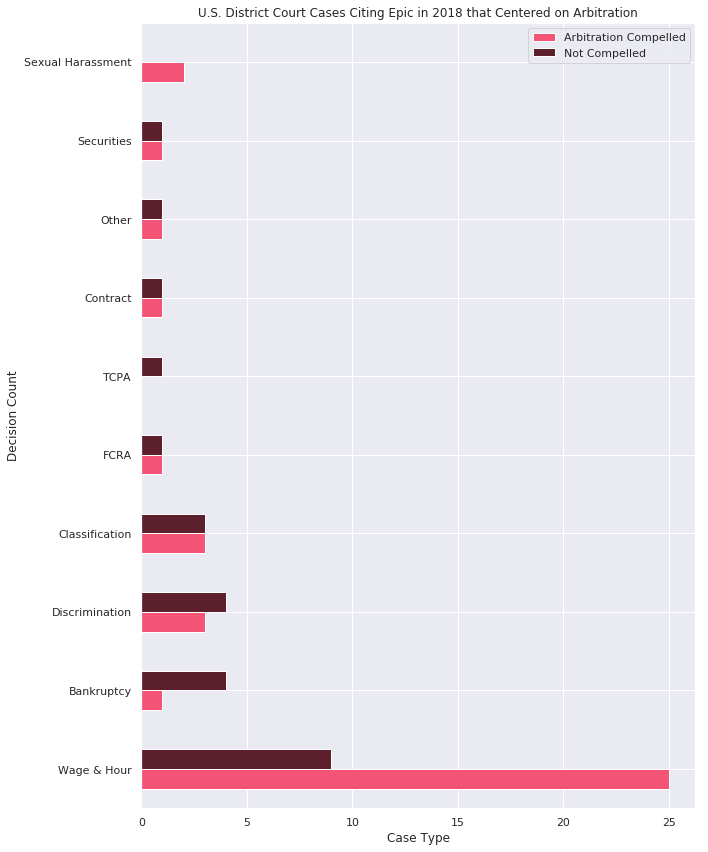

In [29]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)

binary_outcomes.plot(
    ax=ax,
    kind='barh',
    grid=True,
    legend=False,
    color=['#f35476', '#5b202c'],
    title='U.S. District Court Cases Citing Epic in 2018 that Centered on Arbitration'
)

ax.set_ylabel('Decision Count')
ax.set_xlabel('Case Type')
plt.legend()
plt.tight_layout()